In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [71]:
twitter = pd.read_csv('~/Desktop/stats 170b/sample_twitter.csv')

In [72]:
#twitter = pd.read_csv('~/Desktop/stats 170b/metacritic_clean.csv')
twitter.drop_duplicates()
print(twitter.shape)
twitter = twitter[:4547]
print(twitter.shape)

(4542, 5)
(4542, 5)


In [52]:
stopword = nltk.corpus.stopwords.words('english')

# Vader Compound Sentiment Calculations

In [73]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
#df = pd.read_csv('~/Desktop/stats 170b/movie_details_clean.csv')

In [74]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in twitter['text']]
twitter['sentiment_score'] = polarity

In [75]:
score_dict= twitter['text'].apply(lambda items:sent.polarity_scores(items))

In [76]:
todf = dict()
for i in score_dict:
    for row in i: 
        if row not in todf.keys():
            todf[row] = [i[row]]
        else:
            todf[row].append(i[row])

In [77]:
new_d = pd.DataFrame.from_dict(todf)

In [78]:
new_d

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.134,0.499,0.367,0.7249
3,0.050,0.821,0.130,0.5719
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
4537,0.000,1.000,0.000,0.0000
4538,0.121,0.766,0.113,-0.0511
4539,0.000,0.837,0.163,0.5719
4540,0.000,0.517,0.483,0.4215


In [80]:
final = pd.merge(twitter, new_d, right_index = True, left_index = True)

In [81]:
final.to_csv('sample_twitter_vader.csv')

# Word2Vec Word Embedding Calculations

In [82]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

## Pre-Processing

In [84]:
# remove punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
twitter['review_punct'] = twitter['text'].apply(lambda x: remove_punct(x))
twitter.head()


,Unnamed: 0,user.id,create_at,text,Movie,sentiment_score,review_punct
0,47144,3.916531e+07,3/8/22,#TheBatman =L<�=L<�=L<�,The Batman (2022),0.00,TheBatman L�L�L�
1,50307,7.400000e+17,3/10/22,finally a batman that listens to nirvana,The Batman (2022),0.00,finally a batman that listens to nirvana
2,46600,1.490000e+18,3/6/22,@zakiscorner I saw the Batman last night and I Loved it.Was so dark it was cool. What a bad ass!!!,The Batman (2022),0.72,zakiscorner I saw the Batman last night and I Loved itWas so dark it was cool What a bad ass
3,51872,3.993300e+04,3/6/22,I think Ive seen every incarnation of Batman since Adam West. Ive steadily lost interest ever ...,The Batman (2022),0.57,I think Ive seen every incarnation of Batman since Adam West Ive steadily lost interest ever s...
4,52128,7.560000e+17,3/4/22,"After waiting 2 long years, Im FINALLY Watching #TheBatman #InATheater https://t.co/tpcjP2t43p",The Batman (2022),0.00,After waiting long years Im FINALLY Watching TheBatman InATheater httpstcotpcjPtp


In [85]:
# tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
twitter['review_tokenized'] = twitter['review_punct'].apply(lambda x: tokenization(x))
twitter.head()

,Unnamed: 0,user.id,create_at,text,Movie,sentiment_score,review_punct,review_tokenized
0,47144,3.916531e+07,3/8/22,#TheBatman =L<�=L<�=L<�,The Batman (2022),0.00,TheBatman L�L�L�,"[TheBatman, L, L, L, ]"
1,50307,7.400000e+17,3/10/22,finally a batman that listens to nirvana,The Batman (2022),0.00,finally a batman that listens to nirvana,"[finally, a, batman, that, listens, to, nirvana]"
2,46600,1.490000e+18,3/6/22,@zakiscorner I saw the Batman last night and I Loved it.Was so dark it was cool. What a bad ass!!!,The Batman (2022),0.72,zakiscorner I saw the Batman last night and I Loved itWas so dark it was cool What a bad ass,"[zakiscorner, I, saw, the, Batman, last, night, and, I, Loved, itWas, so, dark, it, was, cool, W..."
3,51872,3.993300e+04,3/6/22,I think Ive seen every incarnation of Batman since Adam West. Ive steadily lost interest ever ...,The Batman (2022),0.57,I think Ive seen every incarnation of Batman since Adam West Ive steadily lost interest ever s...,"[I, think, I, ve, seen, every, incarnation, of, Batman, since, Adam, West, I, ve, steadily, lost..."
4,52128,7.560000e+17,3/4/22,"After waiting 2 long years, Im FINALLY Watching #TheBatman #InATheater https://t.co/tpcjP2t43p",The Batman (2022),0.00,After waiting long years Im FINALLY Watching TheBatman InATheater httpstcotpcjPtp,"[After, waiting, long, years, I, m, FINALLY, Watching, TheBatman, InATheater, httpstcotpcjPtp]"


In [86]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
twitter['review_nonstop'] = twitter['review_tokenized'].apply(lambda x: remove_stopwords(x))
twitter.head()

,Unnamed: 0,user.id,create_at,text,Movie,sentiment_score,review_punct,review_tokenized,review_nonstop
0,47144,3.916531e+07,3/8/22,#TheBatman =L<�=L<�=L<�,The Batman (2022),0.00,TheBatman L�L�L�,"[TheBatman, L, L, L, ]","[TheBatman, L, L, L, ]"
1,50307,7.400000e+17,3/10/22,finally a batman that listens to nirvana,The Batman (2022),0.00,finally a batman that listens to nirvana,"[finally, a, batman, that, listens, to, nirvana]","[finally, batman, listens, nirvana]"
2,46600,1.490000e+18,3/6/22,@zakiscorner I saw the Batman last night and I Loved it.Was so dark it was cool. What a bad ass!!!,The Batman (2022),0.72,zakiscorner I saw the Batman last night and I Loved itWas so dark it was cool What a bad ass,"[zakiscorner, I, saw, the, Batman, last, night, and, I, Loved, itWas, so, dark, it, was, cool, W...","[zakiscorner, I, saw, Batman, last, night, I, Loved, itWas, dark, cool, What, bad, ass]"
3,51872,3.993300e+04,3/6/22,I think Ive seen every incarnation of Batman since Adam West. Ive steadily lost interest ever ...,The Batman (2022),0.57,I think Ive seen every incarnation of Batman since Adam West Ive steadily lost interest ever s...,"[I, think, I, ve, seen, every, incarnation, of, Batman, since, Adam, West, I, ve, steadily, lost...","[I, think, I, seen, every, incarnation, Batman, since, Adam, West, I, steadily, lost, interest, ..."
4,52128,7.560000e+17,3/4/22,"After waiting 2 long years, Im FINALLY Watching #TheBatman #InATheater https://t.co/tpcjP2t43p",The Batman (2022),0.00,After waiting long years Im FINALLY Watching TheBatman InATheater httpstcotpcjPtp,"[After, waiting, long, years, I, m, FINALLY, Watching, TheBatman, InATheater, httpstcotpcjPtp]","[After, waiting, long, years, I, FINALLY, Watching, TheBatman, InATheater, httpstcotpcjPtp]"


In [87]:
#Stemming and Lammitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

twitter['review_stemmed'] = twitter['review_nonstop'].apply(lambda x: stemming(x))
twitter.head()

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

twitter['review_lemmatized'] = twitter['review_nonstop'].apply(lambda x: lemmatizer(x))
twitter.head()

,Unnamed: 0,user.id,create_at,text,Movie,sentiment_score,review_punct,review_tokenized,review_nonstop,review_stemmed,review_lemmatized
0,47144,3.916531e+07,3/8/22,#TheBatman =L<�=L<�=L<�,The Batman (2022),0.00,TheBatman L�L�L�,"[TheBatman, L, L, L, ]","[TheBatman, L, L, L, ]","[thebatman, l, l, l, ]","[TheBatman, L, L, L, ]"
1,50307,7.400000e+17,3/10/22,finally a batman that listens to nirvana,The Batman (2022),0.00,finally a batman that listens to nirvana,"[finally, a, batman, that, listens, to, nirvana]","[finally, batman, listens, nirvana]","[final, batman, listen, nirvana]","[finally, batman, listens, nirvana]"
2,46600,1.490000e+18,3/6/22,@zakiscorner I saw the Batman last night and I Loved it.Was so dark it was cool. What a bad ass!!!,The Batman (2022),0.72,zakiscorner I saw the Batman last night and I Loved itWas so dark it was cool What a bad ass,"[zakiscorner, I, saw, the, Batman, last, night, and, I, Loved, itWas, so, dark, it, was, cool, W...","[zakiscorner, I, saw, Batman, last, night, I, Loved, itWas, dark, cool, What, bad, ass]","[zakiscorn, i, saw, batman, last, night, i, love, itwa, dark, cool, what, bad, ass]","[zakiscorner, I, saw, Batman, last, night, I, Loved, itWas, dark, cool, What, bad, as]"
3,51872,3.993300e+04,3/6/22,I think Ive seen every incarnation of Batman since Adam West. Ive steadily lost interest ever ...,The Batman (2022),0.57,I think Ive seen every incarnation of Batman since Adam West Ive steadily lost interest ever s...,"[I, think, I, ve, seen, every, incarnation, of, Batman, since, Adam, West, I, ve, steadily, lost...","[I, think, I, seen, every, incarnation, Batman, since, Adam, West, I, steadily, lost, interest, ...","[i, think, i, seen, everi, incarn, batman, sinc, adam, west, i, steadili, lost, interest, ever, ...","[I, think, I, seen, every, incarnation, Batman, since, Adam, West, I, steadily, lost, interest, ..."
4,52128,7.560000e+17,3/4/22,"After waiting 2 long years, Im FINALLY Watching #TheBatman #InATheater https://t.co/tpcjP2t43p",The Batman (2022),0.00,After waiting long years Im FINALLY Watching TheBatman InATheater httpstcotpcjPtp,"[After, waiting, long, years, I, m, FINALLY, Watching, TheBatman, InATheater, httpstcotpcjPtp]","[After, waiting, long, years, I, FINALLY, Watching, TheBatman, InATheater, httpstcotpcjPtp]","[after, wait, long, year, i, final, watch, thebatman, inatheat, httpstcotpcjptp]","[After, waiting, long, year, I, FINALLY, Watching, TheBatman, InATheater, httpstcotpcjPtp]"


## Gensim Word2Vec Models

In [88]:
corpus_text = 'n'.join(twitter['text'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [89]:
model1 = gensim.models.Word2Vec(data,  min_count = 1, window = 5, sg=0) 
model2 = gensim.models.Word2Vec(data,  min_count = 1,  window = 5, sg = 1)

In [90]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in model1.wv.vocab]
    return np.mean(model1[doc], axis=0)

## Calculating average word embeddings

In [91]:
# CODE FROM
#https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751

def document_vector(word2vec_model, doc):
    vocab = list(word2vec_model.wv.index_to_key)
    doc = [word for word in doc if word in vocab]
    return np.mean(word2vec_model.wv[doc], axis=0)

def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stopword]
    doc = [word for word in doc if word.isalpha()] 
    return doc


def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    vocab = list(word2vec_model.wv.index_to_key)
    return not all(word not in vocab for word in doc)

def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [92]:
movie_titles = twitter['Movie']
# Create a list of strings, one for each title
titles_list = [title for title in movie_titles]

In [93]:
# Preprocess the corpus
corpus = [preprocess(title) for title in titles_list]

# Remove docs that don't include any words in W2V's vocab
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: has_vector_representation(model1, doc))

# Filter out any empty docs
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: (len(doc) != 0))
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model1, doc))
    
X = np.array(x) # list to array

2 docs removed
0 docs removed


In [94]:
tsneDF = pd.DataFrame(x)

In [95]:
tsneDF.to_csv('sample_twitter_doc_reduction.csv')

In [96]:
tsneDF

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.177817,0.900313,0.163814,-0.168468,0.270145,-0.866000,0.070973,1.661853,-0.557167,-0.556881,...,0.723825,0.365256,-0.139645,0.326665,1.086216,-0.028604,-0.293527,-0.640913,-0.002237,0.239325
1,0.177817,0.900313,0.163814,-0.168468,0.270145,-0.866000,0.070973,1.661853,-0.557167,-0.556881,...,0.723825,0.365256,-0.139645,0.326665,1.086216,-0.028604,-0.293527,-0.640913,-0.002237,0.239325
2,0.177817,0.900313,0.163814,-0.168468,0.270145,-0.866000,0.070973,1.661853,-0.557167,-0.556881,...,0.723825,0.365256,-0.139645,0.326665,1.086216,-0.028604,-0.293527,-0.640913,-0.002237,0.239325
3,0.177817,0.900313,0.163814,-0.168468,0.270145,-0.866000,0.070973,1.661853,-0.557167,-0.556881,...,0.723825,0.365256,-0.139645,0.326665,1.086216,-0.028604,-0.293527,-0.640913,-0.002237,0.239325
4,0.177817,0.900313,0.163814,-0.168468,0.270145,-0.866000,0.070973,1.661853,-0.557167,-0.556881,...,0.723825,0.365256,-0.139645,0.326665,1.086216,-0.028604,-0.293527,-0.640913,-0.002237,0.239325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,0.013643,0.076179,0.019879,-0.016376,0.015810,-0.090699,0.010226,0.170604,-0.061386,-0.060262,...,0.077638,0.032399,-0.017793,0.036824,0.107185,0.002585,-0.021598,-0.070498,0.011374,0.022575
4536,0.013643,0.076179,0.019879,-0.016376,0.015810,-0.090699,0.010226,0.170604,-0.061386,-0.060262,...,0.077638,0.032399,-0.017793,0.036824,0.107185,0.002585,-0.021598,-0.070498,0.011374,0.022575
4537,0.007049,0.073782,0.015521,-0.019642,0.021299,-0.065023,0.007999,0.129099,-0.044559,-0.040601,...,0.063821,0.027456,-0.011270,0.028256,0.079415,0.002634,-0.028731,-0.050288,-0.001424,0.015687
4538,0.007049,0.073782,0.015521,-0.019642,0.021299,-0.065023,0.007999,0.129099,-0.044559,-0.040601,...,0.063821,0.027456,-0.011270,0.028256,0.079415,0.002634,-0.028731,-0.050288,-0.001424,0.015687


### visualization of tsne reduction

/Users/alexshlosman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


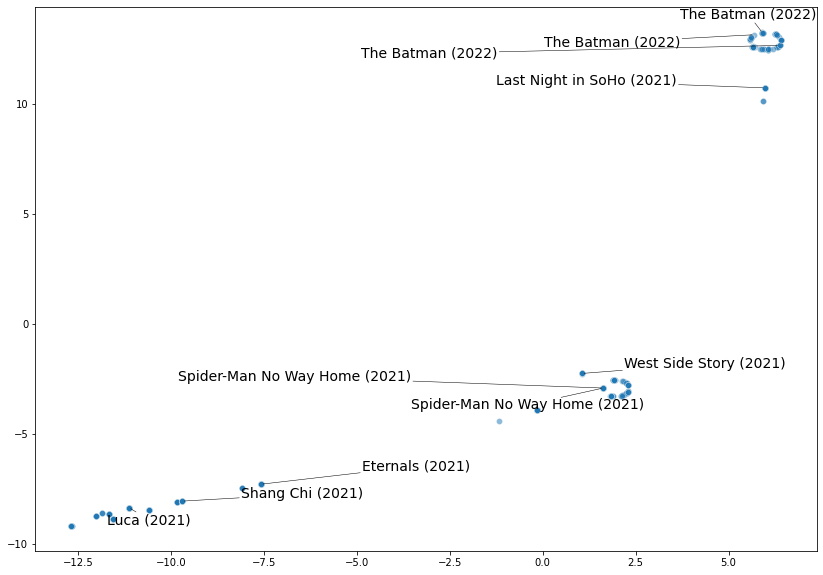

In [98]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Again use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:400])
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 400, 40)) # plots every 40th title in first 400 titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], titles_list[title], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()